# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [14]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (2.787334875311882, 0.24816350947821483)
1    (1.7616970835171282, 0.41443110034469555)
2     (1.7733601810793087, 0.4120213582598897)
3     (2.7699659763952598, 0.2503280582869289)
4     (2.954142844853671, 0.22830532014135116)
dtype: object

#### Interpret the normaltest results and make your observations.

In [19]:
# Explain the test results here
"""Si el valor p es muy pequeño, es poco probable que los datos provengan de una distribucion normal, en estos casos, la distribución que más se acerca es la 5º y la 3º"""

'Si el valor p es muy pequeño, es poco probable que los datos provengan de una distribucion normal, en estos casos, la distribución que más se acerca es la 5º y la 3º'

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

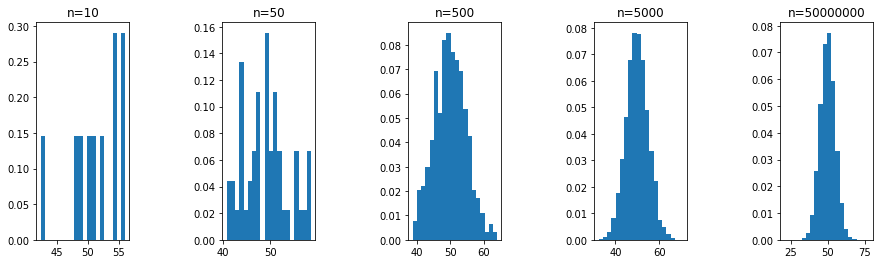

In [15]:
# Your code here
f, ax = plt.subplots(1, 5)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 5):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [20]:
# Your comment and explanation here
# Cuando el sample size es mayor, más tiende a la media la distribución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

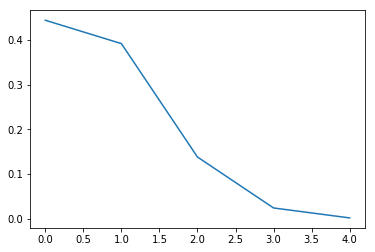

In [29]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
El valor de la mediana aprox 0,15 confirma la hipotesis de un 0,15 de probabilidad de que 
alguien haga clic en el anuncio

#### Now plot PMP with 50, 500, and 5000 visitors.

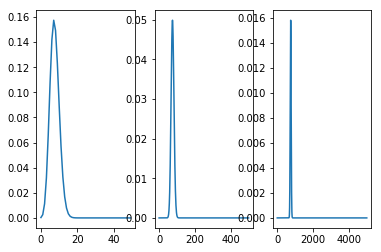

In [28]:
# Your code here
n1, p1 = 50, 0.15
n2, p2 = 500, 0.15
n3, p3 = 5000, 0.15

x1 = range(n1)
x2 = range(n2)
x3 = range(n3)

dist1 = binom(n1, p1)
dist2 = binom(n2, p2)
dist3 = binom(n3, p3)

fig, ax = plt.subplots(1, 1)

plt.subplot(1,3,1)
plt.plot(x1, dist1.pmf(x1))
plt.subplot(1,3,2)
plt.plot(x2, dist2.pmf(x2))
plt.subplot(1,3,3)
plt.plot(x3, dist3.pmf(x3))



#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
Tiende a cumplirse el mismo valor de partida, pero con mayor detalle al ampliar la muestra

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
La probabilidad de que ocurra un determinado numero de eventos durante un cierto tiempo

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [41]:
# Your code here
from scipy.stats import poisson

poisson.pmf(300, 320)

0.01216063471394124

#### What is the probability of getting 60 visits?

In [42]:
# Your code here
poisson.pmf(300, 60)

7.97816763099837e-108

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

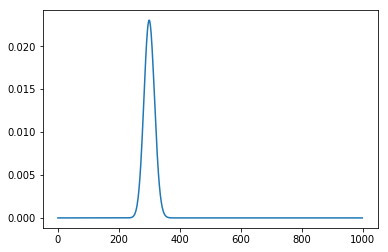

In [43]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)